In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,45.510941,1132.989990
2010-01-05,45.525822,1136.520020
2010-01-06,45.309883,1137.140015
2010-01-07,45.064171,1141.689941
2010-01-08,45.004593,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-01-30,94.519997,2681.050049
2019-01-31,96.470001,2704.100098
2019-02-01,97.470001,2706.530029
2019-02-04,98.029999,2724.870117
2019-02-05,97.440002,2737.699951


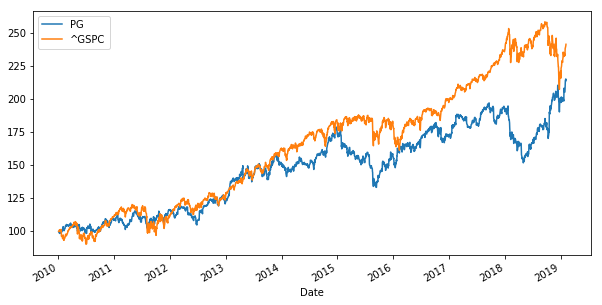

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.083219
^GSPC    0.096443
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.021372,0.011677
^GSPC,0.011677,0.022485


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.532687
^GSPC,0.532687,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([ 0.183436 ,  0.0352369])

In [13]:
arr[0] + arr[1]

0.21867290342518286

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.41080502,  0.58919498])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.091010198780108353

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.017065327277118326

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.13063432656510435

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.095341850392775374,
  0.087243133262292952,
  0.08666280426013924,
  0.090509586504408768,
  0.083756023376129793,
  0.089195257915967274,
  0.0868192957541052,
  0.092592989490501126,
  0.09012386288841405,
  0.095299718091275007,
  0.086545781144319892,
  0.087899076044538046,
  0.083547296492382503,
  0.091483129503626359,
  0.089865564078428023,
  0.090965743591163994,
  0.089319566233145076,
  0.088116110658431432,
  0.094258487939428176,
  0.090298016957057844,
  0.090740115728867671,
  0.094921373771499659,
  0.089233622512170721,
  0.089021849087671967,
  0.087279168447573385,
  0.087037543925944955,
  0.091032082890616678,
  0.090857913610764784,
  0.091598990029482269,
  0.094075399759636219,
  0.083888710441873168,
  0.094668420473882409,
  0.093131583632641443,
  0.09233354792008816,
  0.0862471301302178,
  0.088641228104432701,
  0.08932957534944172,
  0.088433863766781112,
  0.089093493904010071,
  0.090155770246459085,
  0.084243580113963545,
  0.096043071571633859,


In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.08970733,  0.09252269,  0.09386586,  0.0880862 ,  0.09050222,
         0.09428968,  0.08609255,  0.08967566,  0.08698522,  0.09084612,
         0.08396851,  0.09214025,  0.0941554 ,  0.08615784,  0.09312339,
         0.09333465,  0.08430169,  0.09437838,  0.09191688,  0.09106503,
         0.09011594,  0.08856919,  0.08588087,  0.09252605,  0.08690122,
         0.0948404 ,  0.08755867,  0.09639125,  0.08871836,  0.08901367,
         0.09629187,  0.09191673,  0.08682352,  0.09342162,  0.09253197,
         0.08995471,  0.09059914,  0.09526766,  0.09182312,  0.08915985,
         0.08415871,  0.09264881,  0.08716413,  0.09311278,  0.08840141,
         0.08801529,  0.08928999,  0.09397548,  0.08501707,  0.09072978,
         0.09146493,  0.08504526,  0.09505126,  0.09191996,  0.08839315,
         0.0948571 ,  0.09176152,  0.08810476,  0.09012206,  0.09576087,
         0.08765211,  0.08751869,  0.08475679,  0.09342808,  0.09081998,
         0.09452629,  0.08977379,  0.09132509,  0.0

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.089707,0.129593
1,0.092523,0.133713
2,0.093866,0.138027
3,0.088086,0.130434
4,0.090502,0.130047


In [23]:
portfolios.tail()

,Return,Volatility
995,0.088769,0.129792
996,0.089294,0.129582
997,0.089481,0.129568
998,0.089345,0.129575
999,0.084732,0.139361


Text(0,0.5,'Expected Return')

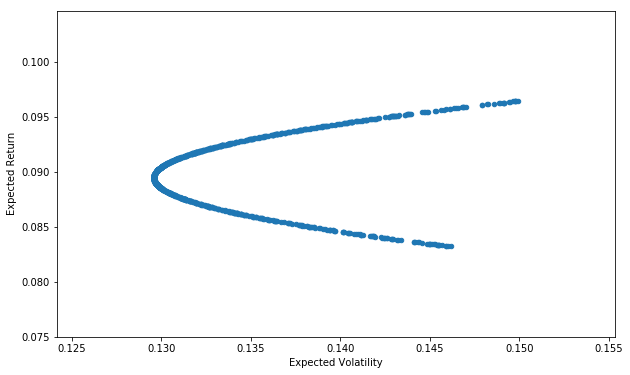

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')